### Data Description:
### YouTube Dislikes Dataset:
#### ● This dataset contains information about trending YouTube videos from August 2020 to December 2021 for the USA, Canada and Great Britain.
#### ● This dataset contains the latest possible information about dislikes,likes,views and more which was collected just before December 13. The information was collected by videos that had been trending inthe USA, Canada, and Great Britain for a year prior.
#### ● Dataset link: https://www.kaggle.com/datasets/dmitrynikolaev/youtube-dislikes-dataset

### 1. Import required libraries and read the provided dataset (youtube_dislike_dataset.csv) and retrieve top 5 and bottom 5 records.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('C:/Users/Admin/Documents/youtube_dislike_dataset.csv')   # Read dataset
print(data.head())    # head function will display the last 5 elements
print(data.tail())    # tail function will display the last 5 elements

      video_id                                       title  \
0  --0bCF-iK2E        Jadon Sancho  Magical Skills & Goals   
1  --14w5SOEUs          Migos - Avalanche (Official Video)   
2  --40TEbZ9Is  Supporting Actress in a Comedy: 73rd Emmys   
3  --4tfbSyYDE     JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO   
4  --DKkzWVh-E                Why Retaining Walls Collapse   

                 channel_id          channel_title         published_at  \
0  UC6UL29enLNe4mqwTfAyeNuw             Bundesliga  2021-07-01 10:00:00   
1  UCGIelM2Dj3zza3xyV3pL3WQ              MigosVEVO  2021-06-10 16:00:00   
2  UClBKH8yZRcM4AsRjDVEdjMg     Television Academy  2021-09-20 01:03:32   
3  UCsmXiDP8S40uBeJYxvyulmA                    JO1  2021-03-03 10:00:17   
4  UCMOqf8ab-42UUQIdVoKwjlQ  Practical Engineering  2021-12-07 13:00:00   

   view_count   likes  dislikes  comment_count  \
0     1048888   19515       226           1319   
1    15352638  359277      7479          18729   
2      925281   11212     

### 2. Check the info of the dataframe and write your inferences on data types and shape of the dataset.

In [6]:
df = pd.DataFrame(data)

df.info()

print(df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37422 entries, 0 to 37421
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       37422 non-null  object
 1   title          37422 non-null  object
 2   channel_id     37422 non-null  object
 3   channel_title  37422 non-null  object
 4   published_at   37422 non-null  object
 5   view_count     37422 non-null  int64 
 6   likes          37422 non-null  int64 
 7   dislikes       37422 non-null  int64 
 8   comment_count  37422 non-null  int64 
 9   tags           37422 non-null  object
 10  description    37422 non-null  object
 11  comments       37264 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.4+ MB
(37422, 12)


### Inferences 
#### The Shape of the data is, the data contain 37422 rows and 12 columns
#### In the given data 4 columns contain numeric data and the rest 8 columns contain either string data 
####  or data having both numeric and non numeric data.
#### The comments columns contain null values 158 null values

### 3. Check for the Percentage of the missing values and drop or impute them.

In [7]:
len_of_data = len(df)
sum_of_null = data.isnull().sum()
per = (sum_of_null / len_of_data) * 100
print(per)   # to calculate the percentage of the missing data

#  dropping the missing values
df.dropna()
a = df.isnull().sum()
print(a)

# 0.42% of data is missing in the comment column

video_id         0.000000
title            0.000000
channel_id       0.000000
channel_title    0.000000
published_at     0.000000
view_count       0.000000
likes            0.000000
dislikes         0.000000
comment_count    0.000000
tags             0.000000
description      0.000000
comments         0.422212
dtype: float64
video_id           0
title              0
channel_id         0
channel_title      0
published_at       0
view_count         0
likes              0
dislikes           0
comment_count      0
tags               0
description        0
comments         158
dtype: int64


### 4. Check the statistical summary of both numerical and categorical columns and write your inferences

In [8]:
# now we are splitting the categorical and continous variable 

cont_var = df.loc[0:, (df.dtypes=='int64') | (df.dtypes=='float64')]  #continous variable data

cate_var = df.loc[0:, df.dtypes=='object']  #categorical variable data


# now describing the statistics of the data

print("Statistics of continous variable \n\n\n",cont_var.describe()) 
print("\n\n\n\n Statictics of categorical variable \n\n\n", cate_var.describe())

Statistics of continous variable 


          view_count         likes      dislikes  comment_count
count  3.742200e+04  3.742200e+04  3.742200e+04   3.742200e+04
mean   5.697838e+06  1.668147e+05  4.989862e+03   9.924930e+03
std    2.426622e+07  5.375670e+05  3.070824e+04   1.171003e+05
min    2.036800e+04  0.000000e+00  0.000000e+00   0.000000e+00
25%    5.122970e+05  1.323350e+04  2.810000e+02   9.000000e+02
50%    1.319078e+06  4.233050e+04  7.960000e+02   2.328000e+03
75%    3.670231e+06  1.304698e+05  2.461750e+03   6.184000e+03
max    1.322797e+09  3.183768e+07  2.397733e+06   1.607103e+07




 Statictics of categorical variable 


            video_id  title                channel_id        channel_title  \
count         37422  37422                     37422                37422   
unique        37422  37113                     10961                10883   
top     --0bCF-iK2E    www  UCNAf1k0yIjyGu3k9BwAg3lg  Sky Sports Football   
freq              1     21                  

### Inferences :

#### The Continous variable  data contain the count, mean, std, min, max, etc
#### The categorical varibale data contain the frequency, count, top, unique

### 5. Convert datatype of column published_at from object to pandas datetime.

In [10]:
# Convert published_at column to pandas datetime
df['published_at'] = pd.to_datetime(df['published_at'])# here we have used to_datetime function to convert the data to date time format

# Check the datatype of published_at column
print(df['published_at'].dtype)

datetime64[ns]


### 6. Create a new column as 'published_month' using the column published_at (display the months only)

In [11]:
df['published_month_num'] = pd.DatetimeIndex(df['published_at']).month
df
# here we have used the pandas inbuilt function DatetimeIndex  and extracting the month               

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments,published_month_num
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi...",7
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...,6
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...,9
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...,3
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37417,zzd4ydafGR0,Lil Tjay - Calling My Phone (feat. 6LACK) [Off...,UCEB4a5o_6KfjxHwNMnmj54Q,Lil Tjay,2021-02-12 05:03:49,120408275,2180780,35871,81360,Lil Tjay Steady Calling My Phone Calling My Ph...,"Official video for ""Calling My Phone"" by Lil T...",'DESTINED 2 WIN' OUT NOW !! https://liltjay.ln...,2
37418,zziBybeSAtw,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,2021-01-16 05:39:05,2841917,20759,1049,2624,NBA G League Basketball game-0022000187 Lakers...,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,Montrezl Harrell is going crazy with the rebou...,1
37419,zzk09ESX7e0,[MV] (MAMAMOO) - Where Are We Now,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,2021-06-02 09:00:10,13346678,720854,4426,90616,MAMAMOO WAW WAW MAMAMOO WAW Where Are We Now...,[MV] (MAMAMOO) - Where Are We Now\n\nInstagra...,I honestly do not know why this song hit so ha...,6
37420,zzmQEb0Em5I,FELLIPE ESCUDERO- Master Podcast #12,UC8NjnNWMsRqq11NYvHAQb1g,Master Podcast,2020-10-20 20:59:30,252057,19198,1234,1471,master masterpodcast lord lord vinheteiro z z ...,DOCTOR HAIR\nhttps://www.thedoctorhair.com/?fb...,Foi um prazer passar esta tarde com vocs debat...,10


### 7. Replace the numbers in the column published_month as names of the months i,e., 1 as 'Jan', 2 as 'Feb and so on.....

In [12]:
dict1 = {1:'jan',2:'feb', 3:'mar', 4:'apr',5:'may', 6:'jun', 7:'jul',8:'aug', 9:'sep', 10:'oct', 
11:'nov',12:'dec'}
df['published_month'] = df['published_month_num'].replace(dict1)
df

# here we have used the dictionry method to replace the months with the name of the months                


,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments,published_month_num,published_month
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi...",7,jul
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...,6,jun
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...,9,sep
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...,3,mar
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...,12,dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37417,zzd4ydafGR0,Lil Tjay - Calling My Phone (feat. 6LACK) [Off...,UCEB4a5o_6KfjxHwNMnmj54Q,Lil Tjay,2021-02-12 05:03:49,120408275,2180780,35871,81360,Lil Tjay Steady Calling My Phone Calling My Ph...,"Official video for ""Calling My Phone"" by Lil T...",'DESTINED 2 WIN' OUT NOW !! https://liltjay.ln...,2,feb
37418,zziBybeSAtw,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,2021-01-16 05:39:05,2841917,20759,1049,2624,NBA G League Basketball game-0022000187 Lakers...,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,Montrezl Harrell is going crazy with the rebou...,1,jan
37419,zzk09ESX7e0,[MV] (MAMAMOO) - Where Are We Now,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,2021-06-02 09:00:10,13346678,720854,4426,90616,MAMAMOO WAW WAW MAMAMOO WAW Where Are We Now...,[MV] (MAMAMOO) - Where Are We Now\n\nInstagra...,I honestly do not know why this song hit so ha...,6,jun
37420,zzmQEb0Em5I,FELLIPE ESCUDERO- Master Podcast #12,UC8NjnNWMsRqq11NYvHAQb1g,Master Podcast,2020-10-20 20:59:30,252057,19198,1234,1471,master masterpodcast lord lord vinheteiro z z ...,DOCTOR HAIR\nhttps://www.thedoctorhair.com/?fb...,Foi um prazer passar esta tarde com vocs debat...,10,oct


### 8. Find the number of videos published each month and arrange the months in a decreasing order based on the video count.

In [13]:
groups = df.groupby('published_month')['published_month_num'].sum().sort_values(ascending=False)
groups
# here we have used in groupby method to group and arrange video count according to the months in decreasing order

published_month
nov    53361
oct    49910
sep    43920
dec    36864
aug    34096
jul    16380
jun    13896
may    10405
apr     8504
mar     6774
feb     4274
jan     2108
Name: published_month_num, dtype: int64

### Obervation :
#### In  maximum number of  videos were published in november month
#### Less number of videos were published in january month

### 9. Find the count of unique video_id, channel_id and channel_title.

In [14]:
video_i =  df['video_id'].nunique()
channel_i = df.channel_id.nunique()
channel_tit = df.channel_title.nunique()
print("Count of Unique video id :- ", video_i)
print("Count of unique channel id :- ", channel_i)
print("Count of unique channel title :- ", channel_tit)

# Here we have used the unique function to find the unqiue count


Count of Unique video id :-  37422
Count of unique channel id :-  10961
Count of unique channel title :-  10883


#### 36964 unique video id are present
#### 10961 unique channel id are present
#### 10880 unique channel title are present

### 10. Find the top10 channel names having the highest number of videos in the dataset and the bottom10 having lowest number of videos.

In [15]:
group1 = df.groupby('channel_title')['published_at'].count().to_frame().sort_values('published_at', ascending=True)
print("Bottom 10 having lowest number of videos\n\n")
print(group1.head(10))
print("\n\nTop 10 having highest number of videos\n\n\n")
print(group1.tail(10))

# here we have used the count function and sort_value function to count and sort the values accordingly


Bottom 10 having lowest number of videos


                              published_at
channel_title                             
   SilverName                            1
Mini Muka                                1
Mini Ladd                                1
MindYourLogic                            1
Mind Body Tonic With Dr Sita             1
Mimi Ar                                  1
Millyz                                   1
Milkair                                  1
Milissa Grande                           1
MikuruSong                               1


Top 10 having highest number of videos



                     published_at
channel_title                    
NHL                            86
FORMULA 1                      87
SSundee                        98
SSSniperWolf                   99
WWE                           122
NFL                           162
NBA                           209
BT Sport                      246
The United Stand              301
Sky Sports Football    

### 11. Find the title of the video which has the maximum number of likes and the title of the video having minimum likes and write your inferences

In [16]:
max_likes = df.groupby('title')['likes'].max().to_frame().sort_values('likes', ascending=False)
# max_likes = group2.head(1)
maxi_lik = max_likes.head(1)
print("maximum likes -> ", maxi_lik)

min_likes =  df.groupby('title')['likes'].min().to_frame().sort_values('likes', ascending=True)
mini_lik = min_likes.head(1)
print("minimum likes -> ", mini_lik)

maximum likes ->                                    likes
title                                  
BTS () 'Dynamite' Official MV  31837675
minimum likes ->                                                      likes
title                                                    
Kim Kardashian's Must-See Moments on "Saturday ...      0


### Infrenecing from the above data
### The BTS () 'Dynamite' Official MV video has maximum number of likes from the given data set that is 31837675 Kim Kardashian's Must-See Moments on "Saturday ... has the minimum number of likes from the given dataset that is 0

### 12. Find the title of the video which has the maximum number of dislikes and the title of the video having minimum dislikes and write your inferences.

In [17]:
max_dislikes = df.groupby('title')['dislikes'].max().to_frame().sort_values('dislikes', ascending=False)
maxi_dis = max_dislikes.head(1)
print(maxi_dis)

min_dislikes = df.groupby('title')['dislikes'].max().to_frame().sort_values('dislikes', ascending=True)
mini_dis = min_dislikes.head(1)
print(mini_dis)

                                     dislikes
title                                        
Cuties | Official Trailer | Netflix   2397733
                                                    dislikes
title                                                       
Kim Kardashian's Must-See Moments on "Saturday ...         0


### Infrenecing from the above data
#### Cuties | Official Trailer | Netflix video has maximum number of dislikes that is 2397733
#### Kim Kardashian's Must-See Moments on Saturday ... video has minimum number of dislikes that is -> 0

### 13. Does the number of views have any effect on how many people disliked the video? Support your answer with a metric and a plot.

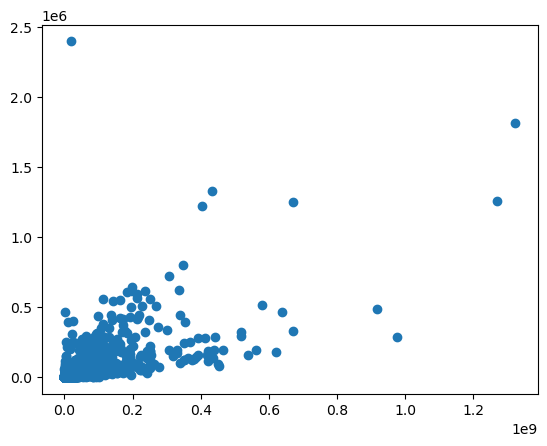

In [18]:
X = data['view_count']
Y = data['dislikes']
plt.scatter(X,Y)

In [19]:
df.dislikes.describe()

count    3.742200e+04
mean     4.989862e+03
std      3.070824e+04
min      0.000000e+00
25%      2.810000e+02
50%      7.960000e+02
75%      2.461750e+03
max      2.397733e+06
Name: dislikes, dtype: float64

### From the above scatter plot we can infer that.
#### As the number of views count increases the dislikes decreases.
#### Thier are 3 outliers.

### 14. Display all the information about the videos that were published in January, and mention the count of videos that were published in January.

In [22]:
jan_month = df[df['published_at'].dt.month==1]
print("\n\njanuary month description ", jan_month.describe())
print(jan_month.info())
print("*"*100)
print(jan_month.describe())


# Thier are 0 non null values




january month description           view_count         likes       dislikes  comment_count  \
count  2.108000e+03  2.108000e+03    2108.000000   2.108000e+03   
mean   4.976449e+06  1.315030e+05    3614.568311   8.923385e+03   
std    2.055331e+07  3.886887e+05   13946.711333   3.664662e+04   
min    2.845000e+04  2.800000e+01       3.000000   0.000000e+00   
25%    4.322335e+05  1.032400e+04     249.000000   8.747500e+02   
50%    1.147500e+06  3.173900e+04     729.000000   2.328500e+03   
75%    3.227483e+06  1.076512e+05    2243.250000   6.302000e+03   
max    6.203274e+08  7.828036e+06  409144.000000   1.095119e+06   

       published_month_num  
count               2108.0  
mean                   1.0  
std                    0.0  
min                    1.0  
25%                    1.0  
50%                    1.0  
75%                    1.0  
max                    1.0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 27 to 37418
Data columns (total 14 columns